In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from datetime import datetime

In [48]:
df3=pd.read_csv("covid_tracking.csv")
# df=pd.read_csv("daily_us.csv")

In [49]:
df_copy=df3.copy()
df_copy.head()

,date,state,positive,negative,pending,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,...,fips,death_increase,hospitalized_increase,negative_increase,positive_increase,total_test_results_increase,fips_code,iso_subdivision,load_time,iso_country
0,2020-07-24,AK,2748.0,197824.0,NaN,37.0,NaN,NaN,NaN,1.0,...,2,0,0,10999,64,11063,2,US-AK,2020-07-25 00:05:13,US
1,2020-07-24,AL,76005.0,552979.0,NaN,1570.0,9157.0,NaN,1058.0,NaN,...,1,41,162,7664,1793,9457,1,US-AL,2020-07-25 00:05:13,US
2,2020-07-24,AR,37249.0,424215.0,NaN,497.0,2361.0,NaN,NaN,109.0,...,5,8,0,13994,990,14984,5,US-AR,2020-07-25 00:05:13,US
3,2020-07-24,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,...,60,0,0,0,0,0,60,US-AS,2020-07-25 00:05:13,US
4,2020-07-24,AZ,156301.0,680516.0,NaN,2844.0,7461.0,837.0,NaN,575.0,...,4,79,225,10747,3357,14104,4,US-AZ,2020-07-25 00:05:13,US


In [50]:
df_copy.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalized_currently', 'hospitalized_cumulative', 'in_icu_currently',
       'in_icu_cumulative', 'on_ventilator_currently',
       'on_ventilator_cumulative', 'recovered', 'data_quality_grade',
       'last_update_et', 'hash', 'date_checked', 'death', 'hospitalized',
       'total', 'total_test_results', 'pos_neg', 'fips', 'death_increase',
       'hospitalized_increase', 'negative_increase', 'positive_increase',
       'total_test_results_increase', 'fips_code', 'iso_subdivision',
       'load_time', 'iso_country'],
      dtype='object')

In [51]:
# sns.heatmap(df_copy.isnull(), cbar=False)
df_copy.drop(["iso_country","load_time",'pos_neg','positive_increase',"iso_subdivision","fips_code","fips",'last_update_et', 'hash',"total_test_results_increase","total","negative_increase","hospitalized_increase","hospitalized","death_increase","last_update_et","load_time","date_checked"],axis=1,inplace=True)

In [ ]:
df_copy.drop(["pending",'on_ventilator_currently'])

In [52]:
df_copy.head()

,date,state,positive,negative,pending,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,recovered,data_quality_grade,death,total_test_results
0,2020-07-24,AK,2748.0,197824.0,NaN,37.0,NaN,NaN,NaN,1.0,NaN,800.0,A,19.0,200572
1,2020-07-24,AL,76005.0,552979.0,NaN,1570.0,9157.0,NaN,1058.0,NaN,565.0,32510.0,B,1438.0,628984
2,2020-07-24,AR,37249.0,424215.0,NaN,497.0,2361.0,NaN,NaN,109.0,329.0,29827.0,A+,394.0,461464
3,2020-07-24,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,0.0,1037
4,2020-07-24,AZ,156301.0,680516.0,NaN,2844.0,7461.0,837.0,NaN,575.0,NaN,20171.0,A+,3142.0,836817


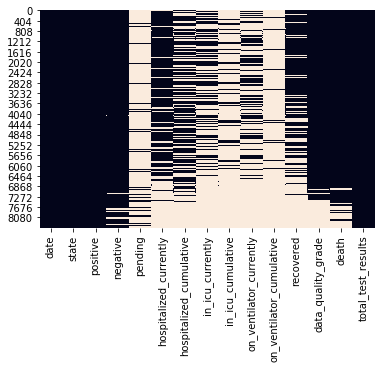

In [53]:
sns.heatmap(df_copy.isnull(), cbar=False)

In [54]:
df_copy.isnull().sum()

date                           0
state                          0
positive                      15
negative                     176
pending                     7326
hospitalized_currently      2814
hospitalized_cumulative     4047
in_icu_currently            5558
in_icu_cumulative           7232
on_ventilator_currently     5889
on_ventilator_cumulative    8081
recovered                   3314
data_quality_grade          1175
death                        767
total_test_results             0
dtype: int64

In [62]:
df_copy.dtypes

date                         object
state                        object
positive                    float64
negative                    float64
pending                     float64
hospitalized_currently      float64
hospitalized_cumulative     float64
in_icu_currently            float64
in_icu_cumulative           float64
on_ventilator_currently     float64
on_ventilator_cumulative    float64
recovered                   float64
data_quality_grade           object
death                       float64
total_test_results            int64
dtype: object

In [65]:
columnData=df_copy.columns.drop(['date','state','data_quality_grade'])

In [66]:
for x in columnData:
    skewVal=df_copy[x].skew()
    print(x,":",skewVal)

positive : 4.210422278493608
negative : 5.314906748698258
pending : 7.0673263289006
hospitalized_currently : 4.794512666645252
hospitalized_cumulative : 5.506335555198957
in_icu_currently : 3.975538701350723
in_icu_cumulative : 1.1747196477091009
on_ventilator_currently : 2.967950428862107
on_ventilator_cumulative : 1.15711577457787
recovered : 2.843733405063294
death : 4.604462945381705
total_test_results : 5.203081260928844


In [80]:
for x in columnData:
    sqskewVal=np.sqrt(df_copy[x]).skew()
    print(x,":",sqskewVal)

positive : 1.6911869271224638
negative : 1.8351123651174055
pending : 3.1179544308282874
hospitalized_currently : 1.9212440003453966
hospitalized_cumulative : 2.9058227173339763
in_icu_currently : 1.7313191928060119
in_icu_cumulative : 0.30134982028982277
on_ventilator_currently : 1.3302490640510762
on_ventilator_cumulative : 0.32238067829829986
recovered : 1.3035703757109436
death : 1.9584412767412398
total_test_results : 1.7972090843481612


In [83]:
for x in columnData:
    df_copy[x]=np.sqrt(df_copy[x])
df_copy.head()    

,date,state,positive,negative,pending,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,recovered,data_quality_grade,death,total_test_results
0,2020-07-24,AK,52.421370,444.774100,NaN,6.082763,NaN,NaN,NaN,1.000000,NaN,28.284271,A,4.358899,447.852654
1,2020-07-24,AL,275.690043,743.625578,NaN,39.623226,95.692215,NaN,32.526912,NaN,23.769729,180.305297,B,37.920970,793.085115
2,2020-07-24,AR,193.000000,651.317895,NaN,22.293497,48.590122,NaN,NaN,10.440307,18.138357,172.704951,A+,19.849433,679.311416
3,2020-07-24,AS,0.000000,32.202484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,0.000000,32.202484
4,2020-07-24,AZ,395.349213,824.933937,NaN,53.329167,86.377080,28.930952,NaN,23.979158,NaN,142.024646,A+,56.053546,914.777022


positive :


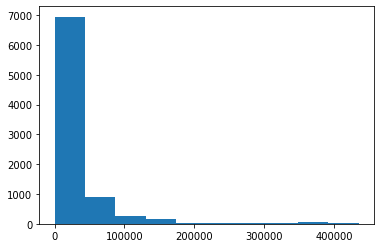

negative :


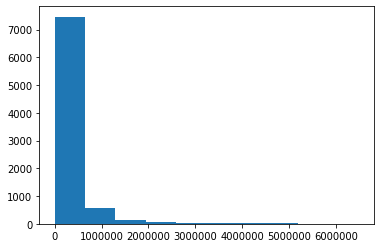

pending :


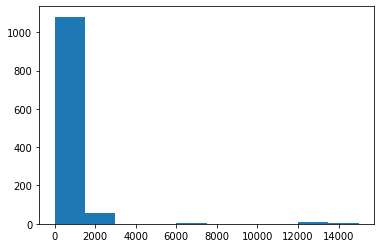

hospitalized_currently :


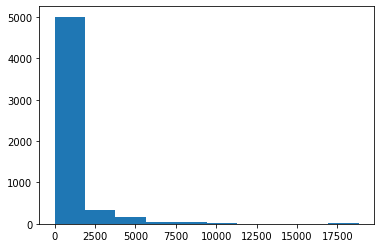

hospitalized_cumulative :


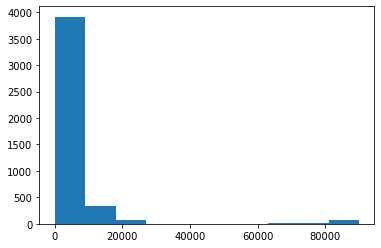

in_icu_currently :


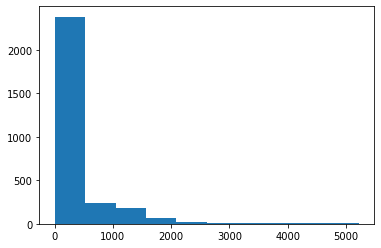

in_icu_cumulative :


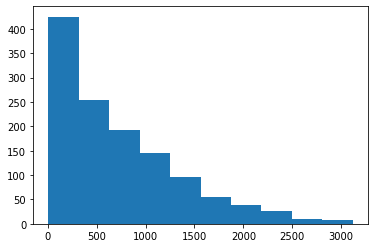

on_ventilator_currently :


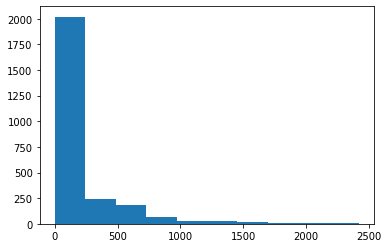

on_ventilator_cumulative :


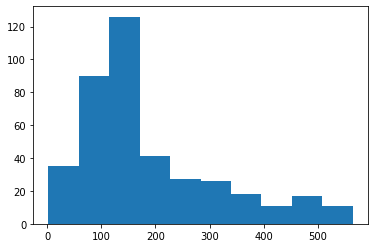

recovered :


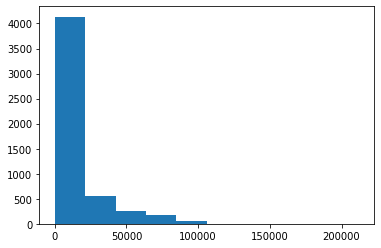

death :


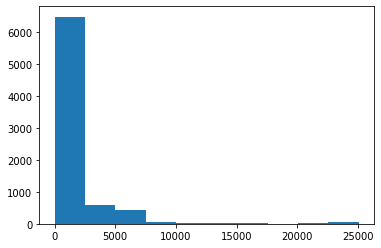

total_test_results :


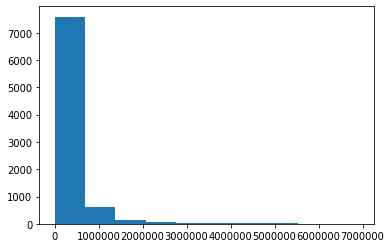

In [74]:
for x in columnData:
    print(x,":")
    plt.hist((df_copy[x]));
    plt.show()
    

positive :


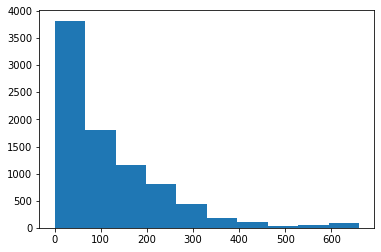

negative :


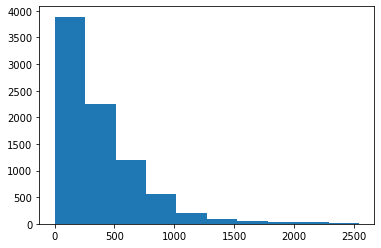

pending :


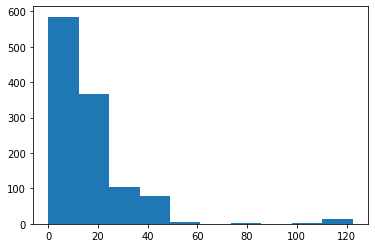

hospitalized_currently :


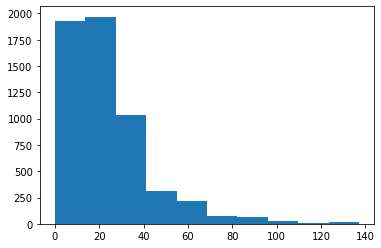

hospitalized_cumulative :


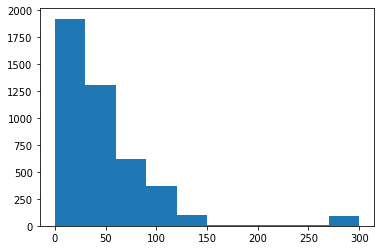

in_icu_currently :


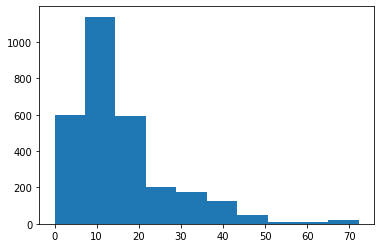

in_icu_cumulative :


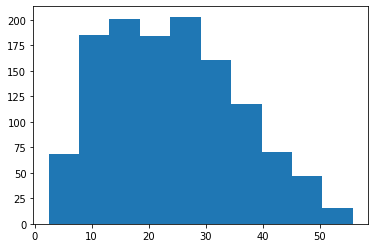

on_ventilator_currently :


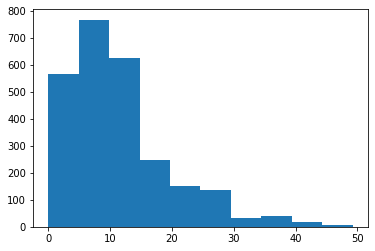

on_ventilator_cumulative :


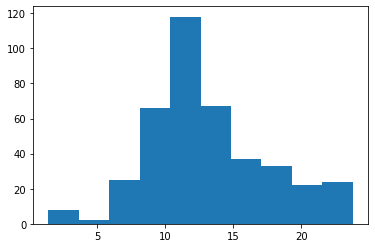

recovered :


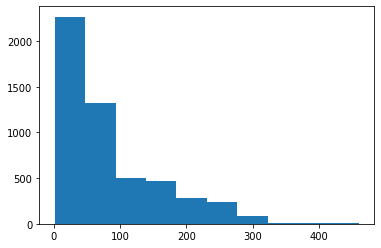

death :


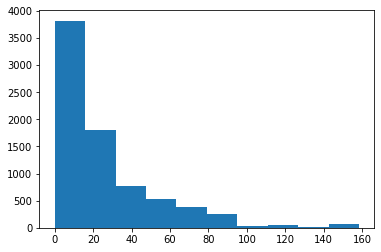

total_test_results :


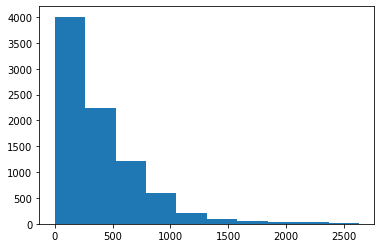

In [75]:
for x in columnData:
    print(x,":")
    plt.hist(np.sqrt(df_copy[x]));
    plt.show()
    

In [97]:
dt=[]
for x in df_copy["date"]:
    dt.append(datetime.strptime(x,'%y-%m-%d'))
    

ValueError: time data '2020-07-24' does not match format '%y-%m-%d'

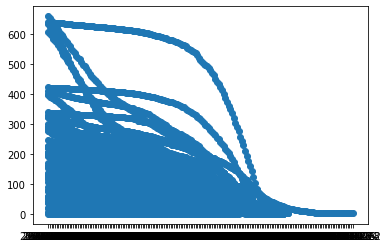

In [86]:
plt.scatter(df_copy["date"],df_copy["positive"])